In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"F:\Industry_Ready\DPP_MLOPs\train.csv")


In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
#get shape of data
data.shape

(193573, 11)

In [5]:
#To check null values
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
#drop unnecessary columns
data.drop('id',axis=1,inplace=True)

In [7]:
#Check and drop duplicates
data.duplicated().sum()

0

In [8]:
numerical_columns = data.columns[data.dtypes!='O']
data[numerical_columns].dtypes

carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
price      int64
dtype: object

In [9]:
cat_columns = data.columns[data.dtypes=='O']
data[cat_columns].dtypes

cut        object
color      object
clarity    object
dtype: object

In [10]:
numerical_columns=numerical_columns.drop('price')

In [11]:
for feature in cat_columns:
    print(data[feature].value_counts(),'\n****************')

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64 
****************
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64 
****************
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64 
****************


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

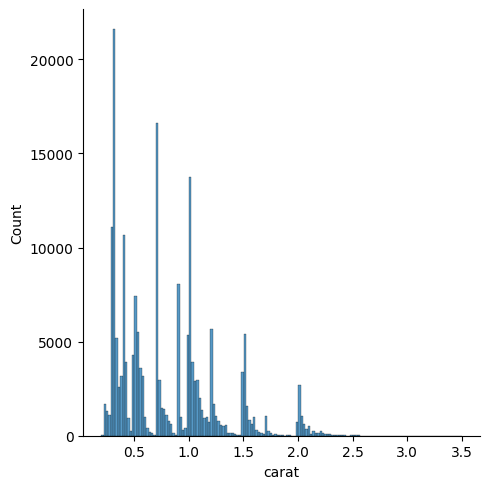

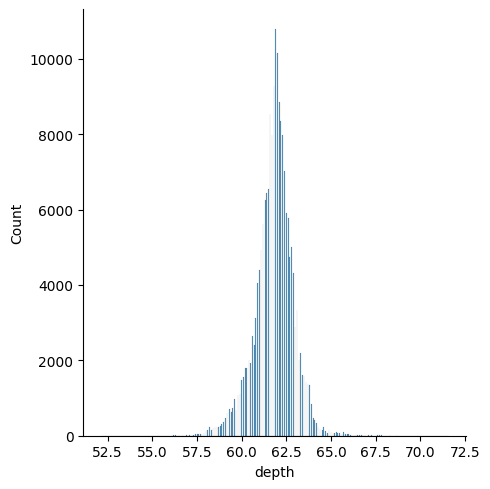

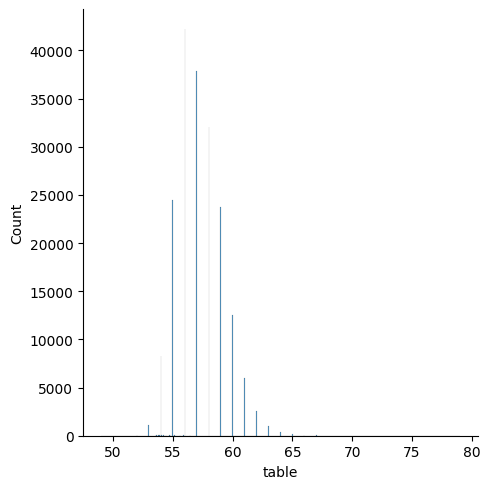

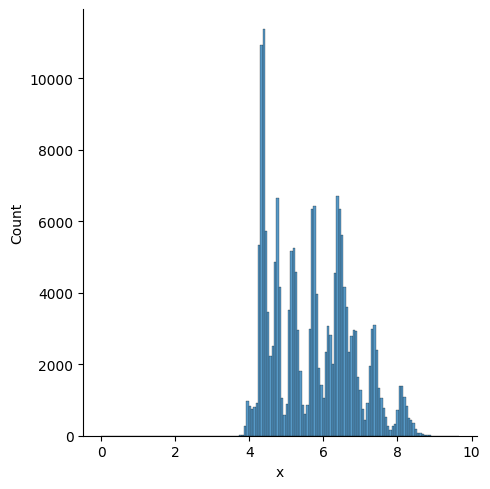

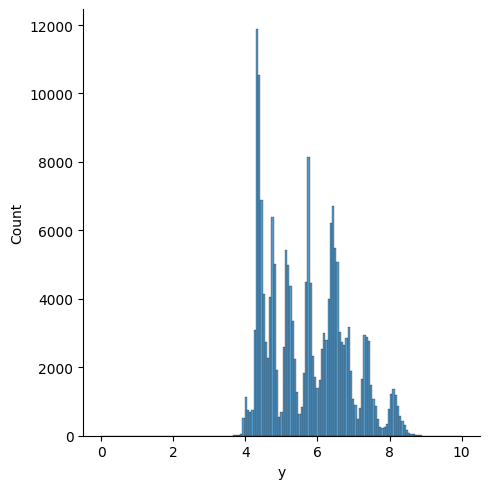

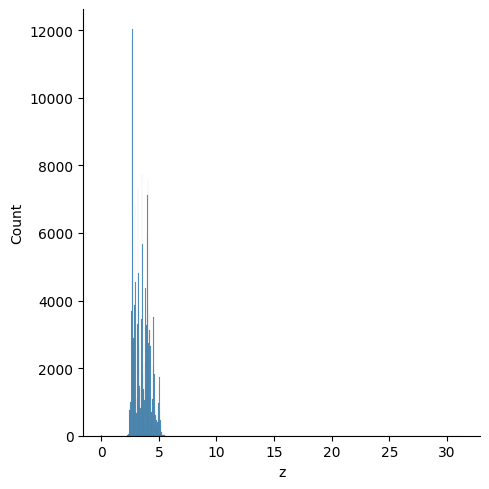

In [13]:
for feature in numerical_columns:
    sns.displot(data=data,x=feature)

<Axes: >

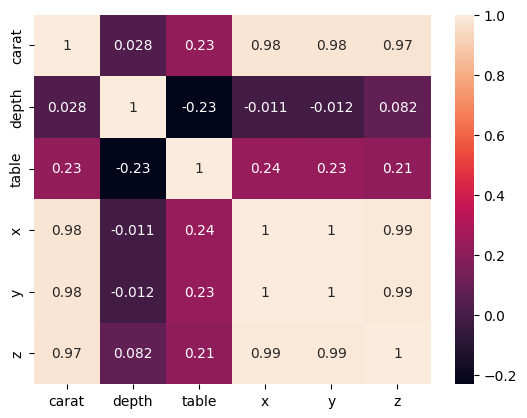

In [14]:
#checking correlation
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [15]:
#mapping categories for ordinal encoding
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [16]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)


In [17]:
data


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
